In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\rafe\appdata\local\programs\python\python35-32\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 52 from C header, got 56 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('mbti_cleaned_dataset.csv')
df.head(3)

,type,posts,avg_post_length,stopword_ratio,clean_posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,90.0,0.382353,intj moment sportscent top ten play prank wha...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,138.0,0.388610,find lack post alarm sex bore posit often exa...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,102.0,0.355581,one cours say know that bless curs doe absolu...,I,N,T,P


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 9 columns):
type               8675 non-null object
posts              8675 non-null object
avg_post_length    8675 non-null float64
stopword_ratio     8675 non-null float64
clean_posts        8675 non-null object
IE                 8675 non-null object
NS                 8675 non-null object
TF                 8675 non-null object
JP                 8675 non-null object
dtypes: float64(2), object(7)
memory usage: 372.8+ KB


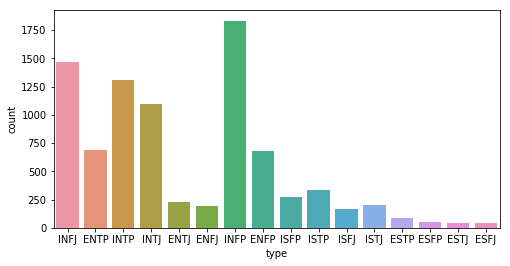

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(df.type)

looks like classes are pretty Imbalanced. What should be done?

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


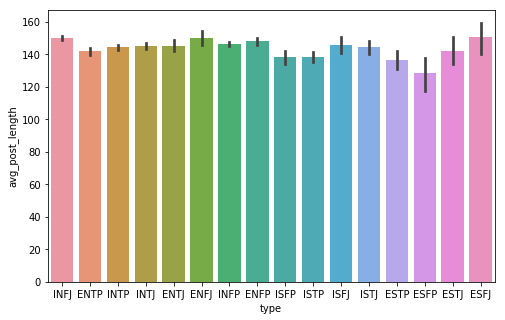

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='avg_post_length', data=df)

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


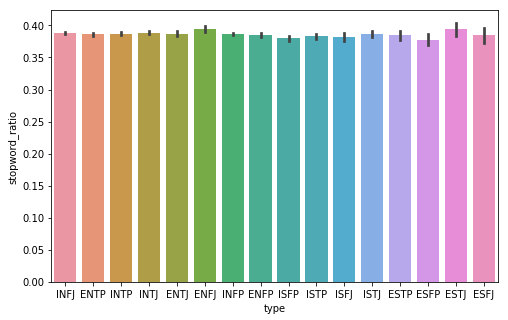

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='stopword_ratio', data=df)

In [13]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = stopwords.words("english")
PS = PorterStemmer()
 
def text_preprocess(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)   # removing links
  x = re.sub(r'@\S+', ' ', x)      # removing mentions
  x = re.sub(r'#\S+', ' ', x)    # removing hashtags
  x = re.sub(r'\'\w+', '', x)   # removing ticks and next character
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)  # removing punctuations
  x = re.sub(r'\w*\d+\w*', '', x)    # removing numbers
  x = re.sub(r'\s{2,}', ' ', x)   # removing extra spaces
  x = ' '.join([PS.stem(word) for word in x.split(' ')])
  return x

## Training and Testing

In [14]:
from sklearn.model_selection import train_test_split

X = df.clean_posts.copy()
y = df.type.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [9]:
## Model Comparison 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

mnb = MultinomialNB()
lr = LogisticRegression()
svc = LinearSVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [16]:
# mnb.fit(X_train_tfidf, y_train)
# lr.fit(X_train_tfidf, y_train)
svc.fit(X_train_tfidf, y_train)
knn.fit(X_train_tfidf, y_train)
dt.fit(X_train_tfidf, y_train)
adb.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
## Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def report(model):
    preds = model.predict(X_test_tfidf)
    print(accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

print('MNB mdoel')
report(mnb)

print('lr mdoel')
report(lr)

print('svc mdoel')
report(svc)

print('knn mdoel')
report(knn)

In [ ]:
print('dt mdoel')
report(dt)

print('adb mdoel')
report(adb)

Only LR and SVC are performing cosideraly. So, we can tune them.

In [ ]:
## LR
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
lr_preds = lr.predict(X_test_tfidf)
print('LR')
print(accuracy_score(y_test, lr_preds))

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [ ]:
sample = 'life is so difficult. I am always sad. Trees are really the gift of nature for us'
lr.predict_proba(tfidf.transform([text_preprocess(sample)]))

In [29]:
lr.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [10]:
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)
preds = lr_model.predict(X_test_tfidf)
print('LR class weight balanced')
print(accuracy_score(y_test, preds))

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR class weight balanced
0.7025936599423631


In [30]:
## SVC
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)
svc_preds = svc.predict(X_test_tfidf)
print('SVC')
print(accuracy_score(y_test, svc_preds))

SVC
0.6610951008645534


In [34]:
svc = LinearSVC(class_weight='balanced')
svc.fit(X_train_tfidf, y_train)
svc_preds = svc.predict(X_test_tfidf)
print('SVC balanced class weight')
print(accuracy_score(y_test, svc_preds))

SVC balanced class weight
0.6806916426512968


## Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'C':[0.1, 0.2, 0.5, 1.0, 1.2] ,
             'fit_intercept':['True', 'False'],
             'multi_class':['ovr', 'crammer_singer']
             }

grid_model = GridSearchCV(estimator=svc,
                         param_grid =param_grid,
                         scoring='accuracy',
                         cv=3)

In [43]:
grid_model.fit(X_train_tfidf, y_train)

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.2, 0.5, 1.0, 1.2], 'multi_class': ['ovr', 'crammer_singer'], 'fit_intercept': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
grid_model.best_params_

{'C': 0.2, 'fit_intercept': 'True', 'multi_class': 'ovr'}

In [ ]:
param_grid = {'C':[0.1, 0.2, 0.5, 1.0, 1.2] ,
             'fit_intercept':['True', 'False'],
             'multi_class':['ovr', 'crammer_singer']
             }

grid_model = GridSearchCV(estimator=svc,
                         param_grid =param_grid,
                         scoring='accuracy',
                         cv=3)

In [45]:
lr?

### Taking a Different Approach. Training 4 Binary Classifiers for each pair i.e. I-E, N-S, T-F, J-P

In [69]:
def model_train_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf.fit(X_train)

    X_train_tfidf = tfidf.transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    mnb.fit(X_train_tfidf, y_train)
    lr.fit(X_train_tfidf, y_train)
    svc.fit(X_train_tfidf, y_train)

    print('MNB mdoel')
    preds = mnb.predict(X_test_tfidf)
    #print(classification_report(y_test, preds))
    print(accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))

    print('lr mdoel')
    preds = lr.predict(X_test_tfidf)
    #print(classification_report(y_test, preds))
    print(accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))

    print('svc mdoel')
    preds = svc.predict(X_test_tfidf)
    #print(classification_report(y_test, preds))
    print(accuracy_score(y_test, preds))
    print(confusion_matrix(y_test, preds))

In [71]:
model_train_evaluate(df.clean_posts, df.IE)

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MNB mdoel
0.768299711815562
[[   0  402]
 [   0 1333]]
lr mdoel
0.8293948126801153
[[ 142  260]
 [  36 1297]]
svc mdoel
0.854178674351585
[[ 208  194]
 [  59 1274]]


In [72]:
model_train_evaluate(df.clean_posts, df.NS)

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MNB mdoel
0.8714697406340057
[[1512    0]
 [ 223    0]]
lr mdoel
0.8927953890489914
[[1500   12]
 [ 174   49]]
svc mdoel
0.8997118155619597
[[1474   38]
 [ 136   87]]


In [73]:
model_train_evaluate(df.clean_posts, df.TF)

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MNB mdoel
0.5752161383285302
[[907   4]
 [733  91]]
lr mdoel
0.8587896253602305
[[808 103]
 [142 682]]
svc mdoel
0.8432276657060519
[[789 122]
 [150 674]]


In [74]:
model_train_evaluate(df.clean_posts, df.JP)

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MNB mdoel
0.6138328530259366
[[   0  670]
 [   0 1065]]
lr mdoel
0.813256484149856
[[430 240]
 [ 84 981]]
svc mdoel
0.7907780979827089
[[457 213]
 [150 915]]


In [121]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([ ('tfidf',TfidfVectorizer()),('lr',LogisticRegression())])

pipe.fit(df['clean_posts'],df['type'])

c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rafe\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [122]:
new_post = 'life is so difficult. I am always sad. Trees are really the gift of nature for us'
new_clean_post = [text_preprocess(new_post)]
print(pipe.predict(new_clean_post))
pipe.predict_proba(new_clean_post)

['INFP']


array([[0.01815638, 0.02417921, 0.02536509, 0.05175787, 0.0068804 ,
        0.01001631, 0.0081203 , 0.01328112, 0.11493155, 0.46284719,
        0.04901378, 0.08927662, 0.02445205, 0.05261949, 0.02665105,
        0.02245159]])

In [125]:
new_post = 'I love systems. Life is like a chess game. system should be improved. efficiency and optimization are different'
new_clean_post = [text_preprocess(new_post)]
print(pipe.predict(new_clean_post))
pipe.predict_proba(new_clean_post)

['INTP']


array([[0.01210603, 0.05027039, 0.02893345, 0.05836848, 0.00543567,
        0.0110195 , 0.00826325, 0.01219271, 0.05320297, 0.1423023 ,
        0.21352388, 0.28356183, 0.01554138, 0.03845242, 0.02614033,
        0.04068542]])

In [92]:
intj = '''These personalities can be both the boldest of dreamers and the bitterest of pessimists. Architects believe that, through willpower and intelligence, they can achieve even the most challenging of goals. But they may be cynical about human nature more generally, assuming that most people are lazy, unimaginative, or simply doomed to mediocrity.
Architects derive much of their self-esteem from their knowledge and mental acuity. In school, people with this personality type may have been called “bookworms” or “nerds.” But rather than taking these labels as insults, many Architects embrace them. They are confident in their ability to teach themselves about – and master – any topic that interests them, whether that’s coding or capoeira or classical music.'''

intp = '''Logicians love to analyze patterns. Without necessarily knowing how they do it, people with this personality type often have a Sherlock Holmes–like knack for spotting discrepancies and irregularities. In other words, it’s a bad idea to lie to them.
Ironically, Logicians shouldn’t always be held at their word. They rarely mean to be dishonest, but with their active minds, they sometimes overflow with ideas and theories that they haven’t thought through all the way. They may change their mind on anything from their weekend plans to a fundamental moral principle, without ever realizing that they’d appeared to have made up their mind in the first place. In addition, they are often happy to play devil’s advocate in order to keep an interesting discussion humming along.'''

entj = '''If there’s anything Commanders love, it’s a good challenge, big or small, and they firmly believe that given enough time and resources, they can achieve any goal. This quality makes people with the Commander personality type brilliant entrepreneurs, and their ability to think strategically and hold a long-term focus while executing each step of their plans with determination and precision makes them powerful business leaders. This determination is often a self-fulfilling prophecy, as Commanders push their goals through with sheer willpower where others might give up and move on, and their Extraverted (E) nature means they are likely to push everyone else right along with them, achieving spectacular results in the process.'''

entp = '''Taking a certain pleasure in being the underdog, Debaters enjoy the mental exercise found in questioning the prevailing mode of thought, making them irreplaceable in reworking existing systems or shaking things up and pushing them in clever new directions. However, they’ll be miserable managing the day-to-day mechanics of actually implementing their suggestions. Debater personalities love to brainstorm and think big, but they will avoid getting caught doing the “grunt work” at all costs. Debaters only make up about three percent of the population, which is just right, as it lets them create original ideas, then step back to let more numerous and fastidious personalities handle the logistics of implementation and maintenance.
Debaters’ capacity for debate can be a vexing one – while often appreciated when it’s called for, it can fall painfully flat when they step on others’ toes by say, openly questioning their boss in a meeting, or picking apart everything their significant other says. This is further complicated by Debaters’ unyielding honesty, as this type doesn’t mince words and cares little about being seen as sensitive or compassionate. Likeminded types get along well enough with people with the Debater personality type, but more sensitive types, and society in general, are often conflict-averse, preferring feelings, comfort, and even white lies over unpleasant truths and hard rationality.'''

infj = '''Advocates generally strive to do what’s right – and they want to help create a world where others do the right thing as well. People with this personality type may feel called to use their strengths – including creativity, imagination, and sensitivity – to uplift others and spread compassion. Concepts like egalitarianism and karma can mean a great deal to Advocates.
Advocates may be reserved, but they communicate in a way that is warm and sensitive. This emotional honesty and insight can make a powerful impression on the people around them.
Advocates value deep, authentic relationships with others, and they tend to take great care with other people’s feelings. That said, these personalities also need to prioritize reconnecting with themselves. Advocates need to take some time alone now and then to decompress, recharge, and process their thoughts and feelings.'''

infp = '''Empathy is among this personality type’s greatest gifts, but at times it can be a liability. The troubles of the world weigh heavily on Mediators’ shoulders, and these personalities can be vulnerable to internalizing other people’s negative moods or mindsets. Unless they learn to set boundaries, Mediators may feel overwhelmed by just how many wrongs there are that need to be set right. People with this personality type tend to feel directionless or stuck until they connect with a sense of purpose for their lives. For many Mediators, this purpose has something to do with uplifting others and their ability to feel other people’s suffering as if it were their own. While Mediators want to help everyone, they need to focus their energy and efforts – otherwise, they can end up exhausted.'''

enfj = '''Protagonists tend to be vocal about their values, including authenticity and altruism. When something strikes them as unjust or wrong, they speak up. But they rarely come across as brash or pushy, as their sensitivity and insight guide them to speak in ways that resonate with others.
These personality types have an uncanny ability to pick up on people’s underlying motivations and beliefs. At times, they may not even understand how they come to grasp another person’s mind and heart so quickly. These flashes of insight can make Protagonists incredibly persuasive and inspiring communicators.Protagonists’ secret weapon is their purity of intent. Generally speaking, they are motivated by a sincere wish to do the right thing rather than a desire to manipulate or have power over other people. Even when they disagree with someone, Protagonists search for common ground. The result is that people with this personality type can communicate with an eloquence and sensitivity that are nearly impossible to ignore – particularly when they speak about matters that are close to their hearts.'''

enfp = '''Friendly and outgoing, Campaigners are devoted to enriching their relationships and their social lives. But beneath their sociable, easygoing exteriors, they have rich, vibrant inner lives as well. Without a healthy dose of imagination, creativity, and curiosity, a Campaigner simply wouldn’t be a Campaigner.
In their unique way, Campaigners can be quite introspective. They can’t help but ponder the deeper meaning and significance of life – even when they should be paying attention to something else. These personalities believe that everything – and everyone – is connected, and they live for the glimmers of insight that they can gain into these connections.'''



tex_lis = [intj, intp, entj, entp, infj, infp, enfj, enfp]

In [133]:
pipe_classes = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

In [158]:
for tex in tex_lis:
    new_clean_post = [text_preprocess(tex)]
    print(pipe.predict(new_clean_post))
    class_probs = np.round(((pipe.predict_proba(new_clean_post)[0]))*100, 2)
    type_probs = sorted(list(zip(class_probs,pipe_classes)), reverse=True) 
    print(type_probs[:4])

['INTP']
[(27.07, 'INTP'), (21.13, 'INTJ'), (12.46, 'INFP'), (8.88, 'INFJ')]
['INTP']
[(26.42, 'INTP'), (19.85, 'INTJ'), (14.82, 'INFJ'), (9.09, 'ENTP')]
['INTJ']
[(22.64, 'INTJ'), (14.0, 'INTP'), (11.47, 'INFJ'), (10.49, 'ENTP')]
['INTP']
[(19.15, 'INTP'), (16.54, 'INTJ'), (14.82, 'ENTP'), (11.92, 'INFP')]
['INFP']
[(25.56, 'INFP'), (24.42, 'INFJ'), (9.32, 'INTP'), (8.1, 'INTJ')]
['INFP']
[(21.83, 'INFP'), (21.25, 'INFJ'), (12.81, 'INTJ'), (9.96, 'INTP')]
['INFJ']
[(23.44, 'INFJ'), (18.56, 'INFP'), (13.37, 'INTJ'), (11.79, 'INTP')]
['INFP']
[(20.69, 'INFP'), (17.36, 'INFJ'), (15.52, 'INTP'), (13.35, 'INTJ')]


The Output is showing almost only INTP, INTJ, INFP, INFJ, and ENTP. Looks like there is problem due to Imbalanced Dataset. Let's check the distribution again..

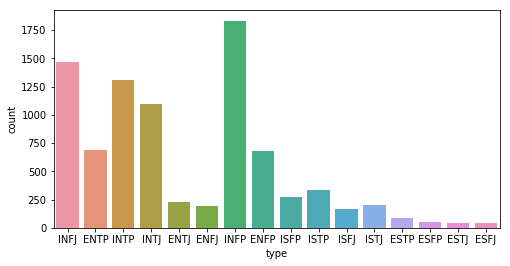

In [159]:
plt.figure(figsize=(8,4))
sns.countplot(df.type)

In [ ]:
def text_preprocess(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)   # removing links
  x = re.sub(r'@\S+', ' ', x)      # removing mentions
  x = re.sub(r'#\S+', ' ', x)    # removing hashtags
  x = re.sub(r'\'\w+', '', x)   # removing ticks and next character
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)  # removing punctuations
  x = re.sub(r'\w*\d+\w*', '', x)    # removing numbers
  x = re.sub(r'\s{2,}', ' ', x)   # removing extra spaces
  x = ' '.join([PS.stem(word) for word in x.split(' ')])
  return x

In [ ]:
df.groupby('IE').

In [95]:
type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
             'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

texts = {}
for t in type_list:
    data = df[df.type==t]['clean_posts']
    text = ''.join(data.tolist())
    texts[t] = text
texts.keys()

dict_keys(['INTP', 'ESFJ', 'ENTJ', 'INFP', 'ENFJ', 'ISTJ', 'ISFP', 'INFJ', 'ENTP', 'ESFP', 'INTJ', 'ESTP', 'ISTP', 'ENFP', 'ESTJ', 'ISFJ'])

In [96]:
type(texts)

dict

In [113]:
data = pd.Series(texts)
data = pd.DataFrame(data, columns=['post'])
data = data.reset_index()
data.columns = ['type', 'post']
print(data.shape)
data.head()

(16, 2)


,type,post
0,ENFJ,o i went break month ago togeth year plan lif...
1,ENFP,want go trip without me stay behind option hi...
2,ENTJ,fire that anoth silli misconcept approach log...
3,ENTP,find lack post alarm sex bore posit often exa...
4,ESFJ,not ani esfj origin mistyp nfp think that inc...


In [ ]:
data.

## Detailed Analysis

In [158]:
pair_text = {}

pair_text['I'] = ''.join(df[df.IE == 'I']['posts']) 
pair_text['E'] = ''.join(df[df.IE == 'E']['posts']) 
pair_text['N'] = ''.join(df[df.NS == 'N']['posts']) 
pair_text['S'] = ''.join(df[df.NS == 'S']['posts']) 
pair_text['T'] = ''.join(df[df.TF == 'T']['posts']) 
pair_text['F'] = ''.join(df[df.TF == 'F']['posts']) 
pair_text['J'] = ''.join(df[df.JP == 'J']['posts']) 
pair_text['P'] = ''.join(df[df.JP == 'P']['posts']) 

MemoryError: 